In [1]:
from sklearn.datasets import load_breast_cancer, load_digits
from sklearn.datasets import load_iris,load_wine
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_mutual_info_score
from sklearn.mixture import GaussianMixture

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import time

##  data load & preprocessiong

In [2]:
data = load_breast_cancer()
X, y = data.data, data.target

In [12]:
print(X.shape[0], X.shape[1])
print("positive: %.2f%%" % (y[y==0].shape[0]/y.shape[0]*100.0))

569 30
positive: 37.26%


In [10]:
random_seed = 0
np.random.seed(random_seed)
X = preprocessing.scale(X)

In [23]:
values, counts = np.unique(y, return_counts=True)
print(values)
print(counts)
print(len(values))

[0 1]
[212 357]
2


# Clustering without Dimentionality Reduction

## 1. K-means

In [31]:
k_grid = np.arange (len(values),X.shape[1]+1)
loss = np.zeros(k_grid.size)
for idx, k in enumerate(k_grid):
    kmeans = KMeans(n_clusters=k, random_state=random_seed)
    kmeans.fit(X)
    loss[idx] = kmeans.inertia_
print(loss)

[11595.46147396 10061.79781824  9266.03667145  8562.23334428
  8127.88031425  7536.44566336  7183.16003327  6873.22869638
  6585.99091647  6426.09211926  6249.90462658  6059.9417769
  5839.56889477  5704.16383749  5627.13888659  5512.53787055
  5371.59599326  5255.59786696  5214.66191874  5114.65832267
  5056.72980196  4950.72547209  4840.1297726   4758.38874819
  4726.19738753  4651.93167314  4587.43134885  4517.86393839
  4463.48963296]


Text(0.5, 1.0, 'Dataset 1: Cancer')

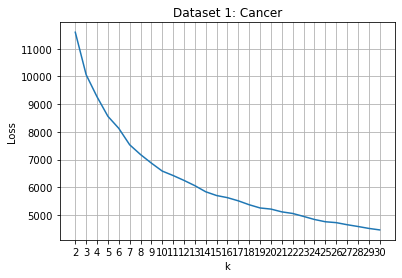

In [43]:
plt.figure()
plt.plot(k_grid, loss)
plt.grid()
plt.xlabel('k')
plt.ylabel('Loss')
plt.xticks(np.arange(len(values), loss.size+2))
plt.title('Dataset 1: Cancer')

### Cluster visualization

******** kmeans (k = 7) ********
inertia:  7536.445663355886
silhouette_score:  0.15439554369124342
adjusted_mutual_info_score:  0.3715946530836432


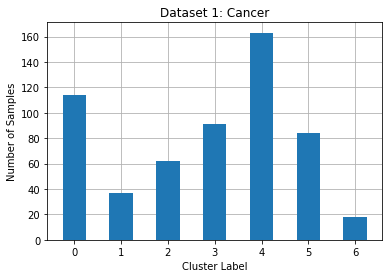

In [109]:
k = 7 #elbow method
kmeans = KMeans(n_clusters = k, random_state = random_seed, max_iter = 300)
kmeans.fit(X)
print ("******** kmeans (k = 7) ********")
print("inertia: ", kmeans.inertia_)
score = silhouette_score(X, kmeans.labels_)
print("silhouette_score: ", score)
ami = adjusted_mutual_info_score(y,kmeans.labels_)
print("adjusted_mutual_info_score: ", ami)

plt.figure()
plt.hist(kmeans.labels_, bins = np.arange(0,k+1) - .5, rwidth=.5, zorder = 2)
plt.xticks(np.arange(0,k))
plt.xlabel('Cluster Label')
plt.ylabel('Number of Samples')
plt.title('Dataset 1: Cancer')
plt.grid()

******** kmeans (k = 10) ********
inertia:  6585.9909164659275
silhouette_score:  0.14432715153743217
adjusted_mutual_info_score:  0.3588843227088969


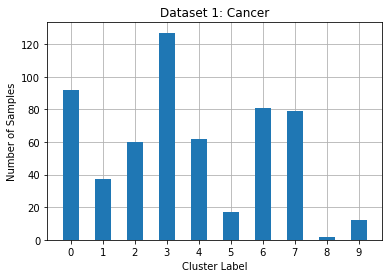

In [110]:
k = 10 #elbow method
kmeans = KMeans(n_clusters = k, random_state = random_seed, max_iter = 300)
kmeans.fit(X)
print ("******** kmeans (k = 10) ********")
print("inertia: ", kmeans.inertia_)
score = silhouette_score(X, kmeans.labels_)
print("silhouette_score: ", score)
ami = adjusted_mutual_info_score(y,kmeans.labels_)
print("adjusted_mutual_info_score: ", ami)

plt.figure()
plt.hist(kmeans.labels_, bins = np.arange(0,k+1) - .5, rwidth=.5, zorder = 2)
plt.xticks(np.arange(0,k))
plt.xlabel('Cluster Label')
plt.ylabel('Number of Samples')
plt.title('Dataset 1: Cancer')
plt.grid()

******** kmeans (k = 2) ********
inertia:  11595.461473962347
silhouette_score:  0.34497400510344084
adjusted_mutual_info_score:  0.5540053760919093


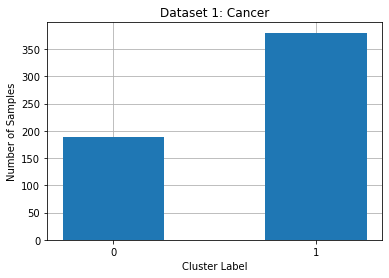

In [111]:
k = 2 #elbow method
kmeans = KMeans(n_clusters = k, random_state = random_seed, max_iter = 300)
kmeans.fit(X)
print ("******** kmeans (k = 2) ********")
print("inertia: ", kmeans.inertia_)
score = silhouette_score(X, kmeans.labels_)
print("silhouette_score: ", score)
ami = adjusted_mutual_info_score(y,kmeans.labels_)
print("adjusted_mutual_info_score: ", ami)

plt.figure()
plt.hist(kmeans.labels_, bins = np.arange(0,k+1) - .5, rwidth=.5, zorder = 2)
plt.xticks(np.arange(0,k))
plt.xlabel('Cluster Label')
plt.ylabel('Number of Samples')
plt.title('Dataset 1: Cancer')
plt.grid()

## 2 Expectation Maximization (EM) - GMM

In [79]:
n_component_grid = np.arange (len(values),X.shape[1]+1)

# bayesian information criterion
bic = np.zeros(n_component_grid.size)
for idx, n in enumerate(n_component_grid):
    gmm = GaussianMixture(n_components = n, random_state = random_seed)
    gmm.fit(X)
    bic[idx]=gmm.bic(X)
print(bic)   

[ 6094.04011987  6293.74091453  7250.78081751  8142.92909381
  8382.64296814  8160.04031835 11627.12701996 13153.13824618
 15330.46901604 16781.32647019 19073.78936834 19665.93663085
 19925.63704749 21168.05150697 20683.69767856 23508.61468032
 24472.33497487 25284.98433635 27095.23311782 30621.56781268
 32560.90289178 32187.23085838 35038.3910993  35811.51052284
 38631.53882656 40555.32045092 41182.89986314 40988.77272166
 44101.85519701]


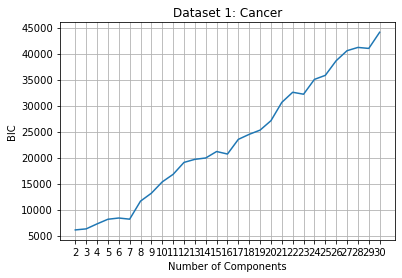

In [101]:
plt.figure()
plt.plot(n_component_grid,bic)
plt.xlabel('Number of Components')
plt.ylabel('BIC')
plt.title('Dataset 1: Cancer')
plt.xticks(np.arange(len(values),X.shape[1]+1))
plt.grid()

In [82]:
n_best = n_component_grid[np.argmin(bic)]
print("Optimal Number of Components: ", n_best)

Optimal Number of Components:  2


******** EM - gmm (n = 2) ********
BIC:  6094.040119869096
silhouette_score:  0.31448870991364997
adjusted_mutual_info_score:  0.660604689588479


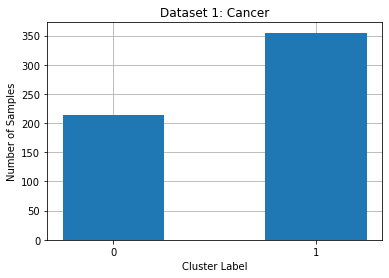

In [116]:
n_best = 2
gmm = GaussianMixture(n_components = n_best, random_state = random_seed, max_iter = 1000)
gmm.fit(X)
gmm_labels = gmm.predict(X)

print ("******** EM - gmm (n = 2) ********")
print('BIC: ', gmm.bic(X))
score_gmm = silhouette_score(X, gmm_labels)
print('silhouette_score: ', score_gmm)
ami_gmm = adjusted_mutual_info_score(y, gmm_labels)
print('adjusted_mutual_info_score: ', ami_gmm)

plt.figure()
plt.hist(gmm_labels, bins = np.arange(0,n_best+1)-.5, rwidth = .5, zorder = 2)
plt.xticks(np.arange(0,n_best))
plt.xlabel('Cluster Label')
plt.ylabel('Number of Samples')
plt.title('Dataset 1: Cancer')


plt.grid()

******** EM - gmm (n = 7) ********
BIC:  8160.040318349831
silhouette_score:  0.1388997701019752
adjusted_mutual_info_score:  0.4184444410542804


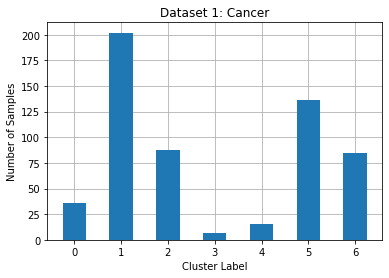

In [117]:
n_best = 7
gmm = GaussianMixture(n_components = n_best, random_state = random_seed, max_iter = 1000)
gmm.fit(X)
gmm_labels = gmm.predict(X)

print ("******** EM - gmm (n = 7) ********")
print('BIC: ', gmm.bic(X))
score_gmm = silhouette_score(X, gmm_labels)
print('silhouette_score: ', score_gmm)
ami_gmm = adjusted_mutual_info_score(y, gmm_labels)
print('adjusted_mutual_info_score: ', ami_gmm)

plt.figure()
plt.hist(gmm_labels, bins = np.arange(0,n_best+1)-.5, rwidth = .5, zorder = 2)
plt.xticks(np.arange(0,n_best))
plt.xlabel('Cluster Label')
plt.ylabel('Number of Samples')
plt.title('Dataset 1: Cancer')
plt.grid()